<a href="https://colab.research.google.com/github/RoseKhayanga/HR_Data_Visualizations_-PowerBI/blob/main/Payroll_Based_Journal_(PBJ)_Daily_Nurse_Staffing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Payroll Based Journal (PBJ) Daily Nurse Staffing Analysis

## DATA ANALYSIS STEPS

 - ***Step 1***: Data Cleaning
 - ***Step 2***: Exploratory Data Analysis
 - ***Step 3***: Data Visualization
 - ***Step 4***: Insight generation

## Importing Data and necessary libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [96]:
PBJDaily_Nursing= pd.read_csv('PBJ_Daily_Nurse_Staffing_Q2_2024.csv',encoding='latin-1')

## Data Overview

In [97]:
PBJDaily_Nursing.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240401,51,10.77,...,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240402,52,8.43,...,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240403,53,11.13,...,0.0,150.31,150.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240404,52,12.27,...,0.0,133.01,133.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240405,52,4.95,...,0.0,137.92,137.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
PBJDaily_Nursing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325324 entries, 0 to 1325323
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   PROVNUM           1325324 non-null  object 
 1   PROVNAME          1325324 non-null  object 
 2   CITY              1325324 non-null  object 
 3   STATE             1325324 non-null  object 
 4   COUNTY_NAME       1325324 non-null  object 
 5   COUNTY_FIPS       1325324 non-null  int64  
 6   CY_Qtr            1325324 non-null  object 
 7   WorkDate          1325324 non-null  int64  
 8   MDScensus         1325324 non-null  int64  
 9   Hrs_RNDON         1325324 non-null  float64
 10  Hrs_RNDON_emp     1325324 non-null  float64
 11  Hrs_RNDON_ctr     1325324 non-null  float64
 12  Hrs_RNadmin       1325324 non-null  float64
 13  Hrs_RNadmin_emp   1325324 non-null  float64
 14  Hrs_RNadmin_ctr   1325324 non-null  float64
 15  Hrs_RN            1325324 non-null  float64
 16  

## Data Cleaning

In [135]:
# Checking for duplicates
PBJDaily_Nursing.duplicated().sum()

np.int64(0)

In [136]:
# Checking for nulls
PBJDaily_Nursing.isnull().sum()

,0
PROVNUM,0
PROVNAME,0
CITY,0
STATE,0
COUNTY_NAME,0
COUNTY_FIPS,0
CY_Qtr,0
WorkDate,0
MDScensus,0
Hrs_RNDON,0


In [101]:
print(PBJDaily_Nursing.columns)

Index(['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS',
       'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr',
       'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr'],
      dtype='object')


In [102]:
print(PBJDaily_Nursing.columns.tolist())

['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS', 'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin', 'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn', 'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp', 'Hrs_MedAide_ctr']


In [104]:
print(PBJDaily_Nursing.dtypes)

PROVNUM              object
PROVNAME             object
CITY                 object
STATE                object
COUNTY_NAME          object
COUNTY_FIPS           int64
CY_Qtr               object
WorkDate              int64
MDScensus             int64
Hrs_RNDON           float64
Hrs_RNDON_emp       float64
Hrs_RNDON_ctr       float64
Hrs_RNadmin         float64
Hrs_RNadmin_emp     float64
Hrs_RNadmin_ctr     float64
Hrs_RN              float64
Hrs_RN_emp          float64
Hrs_RN_ctr          float64
Hrs_LPNadmin        float64
Hrs_LPNadmin_emp    float64
Hrs_LPNadmin_ctr    float64
Hrs_LPN             float64
Hrs_LPN_emp         float64
Hrs_LPN_ctr         float64
Hrs_CNA             float64
Hrs_CNA_emp         float64
Hrs_CNA_ctr         float64
Hrs_NAtrn           float64
Hrs_NAtrn_emp       float64
Hrs_NAtrn_ctr       float64
Hrs_MedAide         float64
Hrs_MedAide_emp     float64
Hrs_MedAide_ctr     float64
dtype: object


In [105]:
PBJDaily_Nursing.shape

(1325324, 33)

### changing workdate to date data type

In [106]:
PBJDaily_Nursing['WorkDate']=pd.to_datetime(PBJDaily_Nursing['WorkDate'], format='%Y%m%d')

### converting provisional number to a string datatype

In [107]:
PBJDaily_Nursing['PROVNUM']=PBJDaily_Nursing['PROVNUM'].astype(str)

### Convert numeric columns to appropriate data types

In [108]:
numeric_columns = ['COUNTY_FIPS', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr',
                  'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp',
                  'Hrs_RN_ctr', 'Hrs_LPNadmin', 'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr',
                  'Hrs_LPN', 'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp',
                  'Hrs_CNA_ctr', 'Hrs_NAtrn', 'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr',
                  'Hrs_MedAide', 'Hrs_MedAide_emp', 'Hrs_MedAide_ctr']

for col in numeric_columns:
    PBJDaily_Nursing[col] = pd.to_numeric(PBJDaily_Nursing[col], errors='coerce')

### Check for any negative values in hours and HPRD columns

In [137]:
#Checking for any negative hours hich could be error and fix
numeric_columns = ['Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin', 'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn', 'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp', 'Hrs_MedAide_ctr']
for column in numeric_columns:
     neg_count = (PBJDaily_Nursing[numeric_columns] < 0).sum()
if neg_count.any():
    print("Negative values found in the numeric columns.")
else:
    print("No negative values found in the numeric columns.")


No negative values found in the numeric columns.


### Summary statistics for key columns

In [110]:
print(PBJDaily_Nursing[numeric_columns + ['MDScensus']].describe())

          Hrs_RNDON  Hrs_RNDON_emp  Hrs_RNDON_ctr   Hrs_RNadmin  \
count  1.325324e+06   1.325324e+06   1.325324e+06  1.325324e+06   
mean   5.195887e+00   5.099312e+00   9.657448e-02  1.026275e+01   
std    4.389664e+00   4.382255e+00   9.182349e-01  1.476875e+01   
min    0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
25%    0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
50%    8.000000e+00   8.000000e+00   0.000000e+00  7.500000e+00   
75%    8.000000e+00   8.000000e+00   0.000000e+00  1.600000e+01   
max    1.039600e+02   1.039600e+02   2.575000e+01  2.755000e+02   

       Hrs_RNadmin_emp  Hrs_RNadmin_ctr        Hrs_RN    Hrs_RN_emp  \
count     1.325324e+06     1.325324e+06  1.325324e+06  1.325324e+06   
mean      1.001164e+01     2.511122e-01  3.480192e+01  3.199023e+01   
std       1.455953e+01     1.845270e+00  3.532269e+01  3.226092e+01   
min       0.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00   
25%       0.000000e+00     0.000000e+00  

### Data types after conversion

In [111]:
PBJDaily_Nursing.dtypes

,0
PROVNUM,object
PROVNAME,object
CITY,object
STATE,object
COUNTY_NAME,object
COUNTY_FIPS,int64
CY_Qtr,object
WorkDate,datetime64[ns]
MDScensus,int64
Hrs_RNDON,float64


## Exploratory Data Analysis

### Total Hrs for the different nursing staff

In [138]:
PBJDaily_Nursing['Total_RN_Hours'] = PBJDaily_Nursing['Hrs_RNDON'] + PBJDaily_Nursing['Hrs_RNadmin'] + PBJDaily_Nursing['Hrs_RN']
PBJDaily_Nursing['Total_LPN_Hours'] = PBJDaily_Nursing['Hrs_LPNadmin'] + PBJDaily_Nursing['Hrs_LPN']
PBJDaily_Nursing['Total_CNA_Hours'] = PBJDaily_Nursing['Hrs_CNA'] + PBJDaily_Nursing['Hrs_NAtrn']
PBJDaily_Nursing['Total_MedAide_Hours'] = PBJDaily_Nursing['Hrs_MedAide']
PBJDaily_Nursing['Total_Nursing_Hours'] = PBJDaily_Nursing['Total_RN_Hours'] + PBJDaily_Nursing['Total_LPN_Hours'] + PBJDaily_Nursing['Total_CNA_Hours'] + PBJDaily_Nursing['Hrs_MedAide']

### Total Hours Per Resident Day (HPRD)


In [139]:
PBJDaily_Nursing['RN_HPRD'] = PBJDaily_Nursing['Total_RN_Hours'] / PBJDaily_Nursing['MDScensus']
PBJDaily_Nursing['LPN_HPRD'] = PBJDaily_Nursing['Total_LPN_Hours'] / PBJDaily_Nursing['MDScensus']
PBJDaily_Nursing['CNA_HPRD'] = PBJDaily_Nursing['Total_CNA_Hours'] / PBJDaily_Nursing['MDScensus']
PBJDaily_Nursing['MedAide_HPRD'] = PBJDaily_Nursing['Total_MedAide_Hours'] / PBJDaily_Nursing['MDScensus']
PBJDaily_Nursing['Total_HPRD'] = PBJDaily_Nursing['Total_Nursing_Hours'] / PBJDaily_Nursing['MDScensus']

### Remove rows with zero census (invalid data)

In [140]:
PBJDaily_Nursing_clean = PBJDaily_Nursing[PBJDaily_Nursing['MDScensus'] > 0].copy()

### Check data for cleaned dataset

In [141]:
print(f"\
Original dataset: {len(PBJDaily_Nursing)} rows")
print(f"Cleaned dataset: {len(PBJDaily_Nursing_clean)} rows")
print(f"Removed {len(PBJDaily_Nursing) - len(PBJDaily_Nursing_clean)} rows with zero census")

Original dataset: 1325324 rows
Cleaned dataset: 1325004 rows
Removed 320 rows with zero census


In [143]:
print("\
Data types after conversion:")
print(PBJDaily_Nursing_clean.dtypes)

Data types after conversion:
PROVNUM                        object
PROVNAME                       object
CITY                           object
STATE                          object
COUNTY_NAME                    object
COUNTY_FIPS                     int64
CY_Qtr                         object
WorkDate               datetime64[ns]
MDScensus                       int64
Hrs_RNDON                     float64
Hrs_RNDON_emp                 float64
Hrs_RNDON_ctr                 float64
Hrs_RNadmin                   float64
Hrs_RNadmin_emp               float64
Hrs_RNadmin_ctr               float64
Hrs_RN                        float64
Hrs_RN_emp                    float64
Hrs_RN_ctr                    float64
Hrs_LPNadmin                  float64
Hrs_LPNadmin_emp              float64
Hrs_LPNadmin_ctr              float64
Hrs_LPN                       float64
Hrs_LPN_emp                   float64
Hrs_LPN_ctr                   float64
Hrs_CNA                       float64
Hrs_CNA_emp          

### Number of unique facilities

In [144]:
PBJDaily_Nursing['PROVNUM'].nunique()

14579

### Facilities distribution by state


In [145]:
PBJDaily_Nursing['STATE'].nunique()

52

In [146]:
print(PBJDaily_Nursing['STATE'].value_counts().head(10))

STATE
TX    106288
CA    103922
OH     83902
FL     62881
IL     61243
PA     60333
NY     54327
IN     46319
MO     43225
MI     38311
Name: count, dtype: int64


In [152]:
print(PBJDaily_Nursing['STATE'].value_counts().tail(10))

STATE
NM    6006
NV    6006
MT    5460
DE    3913
HI    3640
VT    3003
WY    3003
DC    1547
AK    1274
PR     546
Name: count, dtype: int64


### Facilities distribution by cities

In [147]:
PBJDaily_Nursing['CITY'].nunique()

5086

In [148]:
print(PBJDaily_Nursing['CITY'].value_counts())

CITY
CHICAGO        7098
LOS ANGELES    6734
CINCINNATI     6461
HOUSTON        5733
SAN ANTONIO    5551
               ... 
COTULLA          91
FORNEY           91
KYLE             91
DENVER CITY      91
BREWTON          91
Name: count, Length: 5086, dtype: int64


## Data Visualization


In [120]:
plt.style.use('default')
fig = plt.figure(figsize=(40, 44))

<Figure size 4000x4400 with 0 Axes>

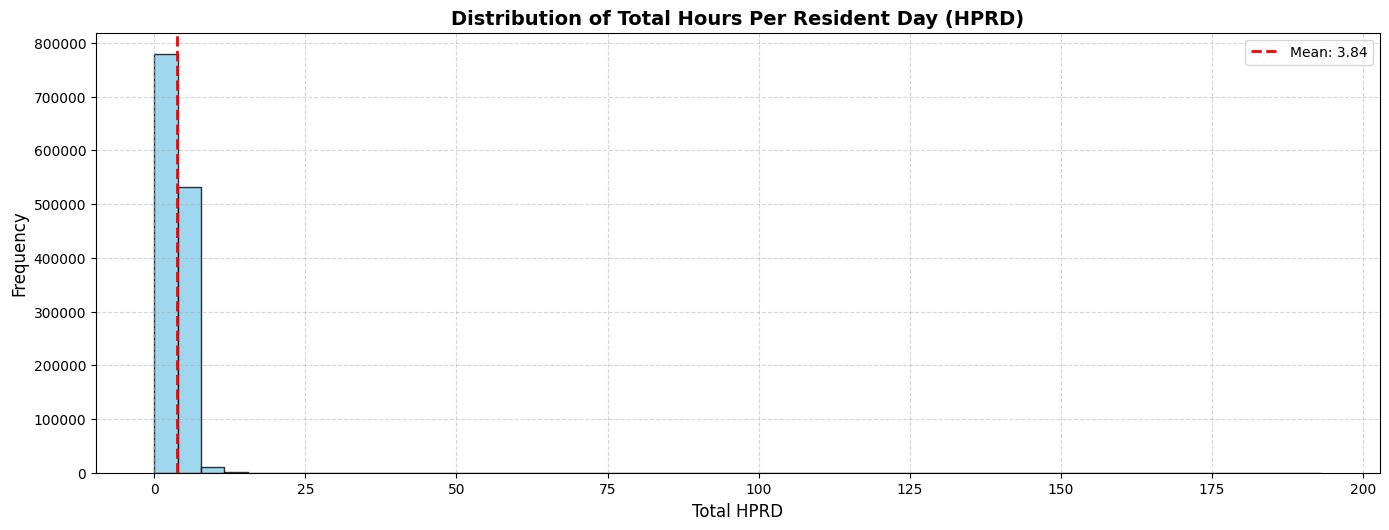

In [121]:
# 1. Distribution of Total Hours Per Resident Day (HPRD)
plt.figure(figsize=(40, 20))

# Create subplot
plt.subplot(4, 3, 1)

# Plot histogram with improved styling
plt.hist(
    PBJDaily_Nursing_clean['Total_HPRD'],
    bins=50,
    alpha=0.8,
    color='skyblue',
    edgecolor='black'
)

# Add title and axis labels with improved formatting
plt.title(
    'Distribution of Total Hours Per Resident Day (HPRD)',
    fontsize=14,
    fontweight='bold'
)
plt.xlabel('Total HPRD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid with better visibility
plt.grid(True, linestyle='--', alpha=0.5)

# Add tighter layout to prevent overlapping
plt.tight_layout()

# Optional: Add mean line for context
mean_value = PBJDaily_Nursing_clean['Total_HPRD'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()

# Show plot
plt.show()

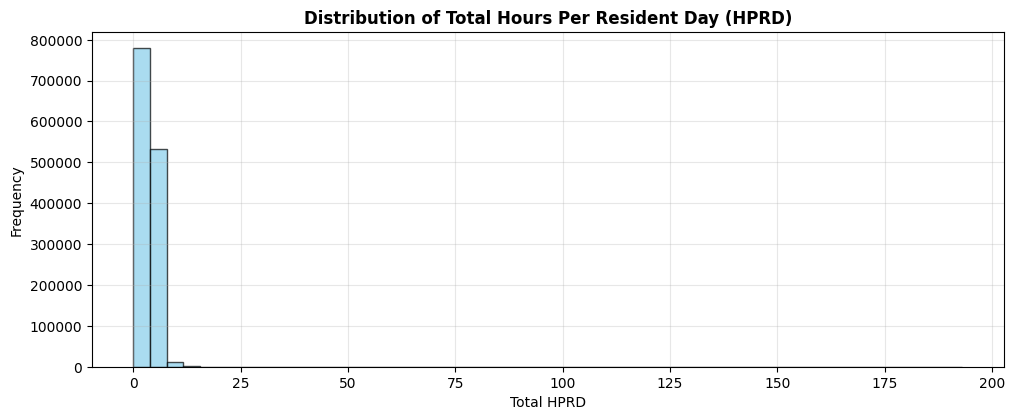

In [122]:
plt.figure(figsize=(40, 20))
plt.subplot(4, 3, 1)
plt.hist(PBJDaily_Nursing_clean['Total_HPRD'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Hours Per Resident Day (HPRD)', fontsize=12, fontweight='bold')
plt.xlabel('Total HPRD')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

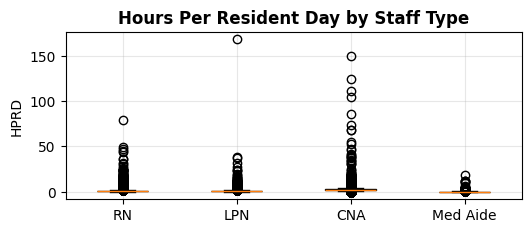

In [151]:
# 2. HPRD by Staff Type
plt.figure(figsize=(20, 10))
plt.subplot(4, 3, 2)
hprd_data = [PBJDaily_Nursing_clean['RN_HPRD'], PBJDaily_Nursing_clean['LPN_HPRD'], PBJDaily_Nursing_clean['CNA_HPRD'], PBJDaily_Nursing_clean['MedAide_HPRD']]
labels = ['RN', 'LPN', 'CNA', 'Med Aide']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1','#FFD166']
plt.boxplot(hprd_data, labels=labels, patch_artist=True)
for patch, color in zip(plt.gca().artists, colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
plt.title('Hours Per Resident Day by Staff Type', fontsize=12, fontweight='bold')
plt.ylabel('HPRD')
plt.grid(True, alpha=0.3)

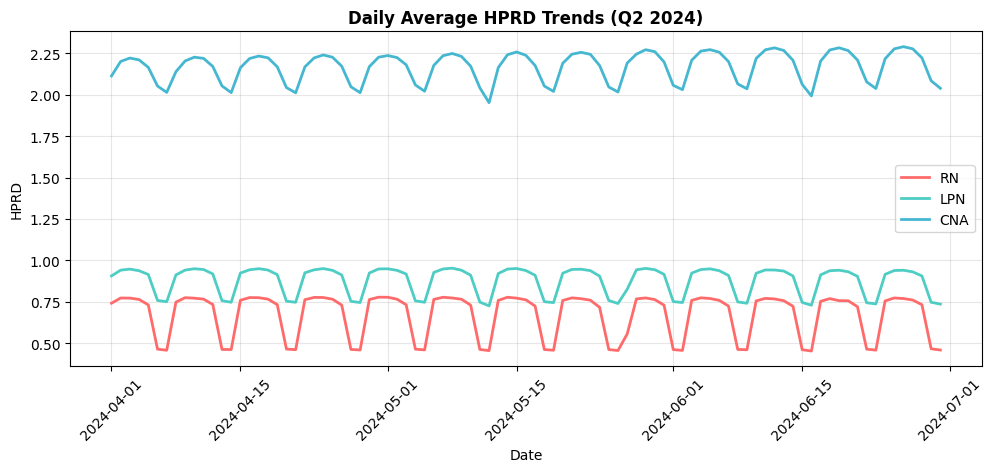

In [124]:
# 4. Staffing Trends Over Time
plt.figure(figsize=(40,20))
plt.subplot(4, 3, 4)
daily_avg = PBJDaily_Nursing_clean.groupby('WorkDate')[['RN_HPRD', 'LPN_HPRD', 'CNA_HPRD']].mean()
plt.plot(daily_avg.index, daily_avg['RN_HPRD'], label='RN', color='#FF6B6B', linewidth=2)
plt.plot(daily_avg.index, daily_avg['LPN_HPRD'], label='LPN', color='#4ECDC4', linewidth=2)
plt.plot(daily_avg.index, daily_avg['CNA_HPRD'], label='CNA', color='#45B7D1', linewidth=2)
plt.title('Daily Average HPRD Trends (Q2 2024)', fontsize=12, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('HPRD')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

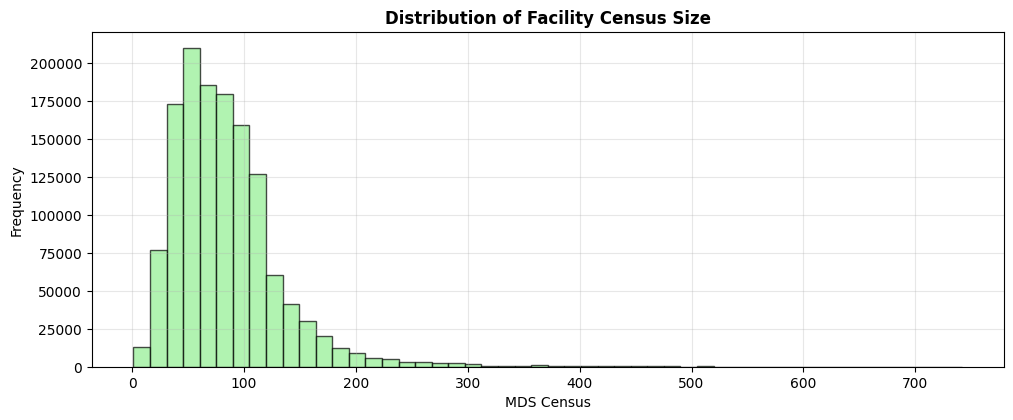

In [125]:
# 5. Facility Size Distribution (by census)
plt.figure(figsize=(40, 20))
plt.subplot(4, 3, 5)
plt.hist(PBJDaily_Nursing_clean['MDScensus'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Facility Census Size', fontsize=12, fontweight='bold')
plt.xlabel('MDS Census')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

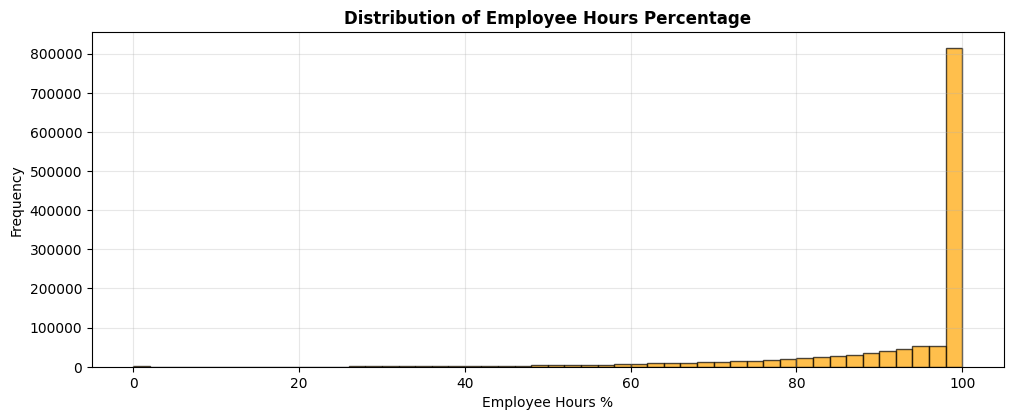

In [126]:
# 6. Employee vs Contract Hours Distribution
plt.figure(figsize=(40,20))
plt.subplot(4, 3, 6)
total_emp_hours = PBJDaily_Nursing_clean['Hrs_RN_emp'] + PBJDaily_Nursing_clean['Hrs_LPN_emp'] + PBJDaily_Nursing_clean['Hrs_CNA_emp']
total_ctr_hours = PBJDaily_Nursing_clean['Hrs_RN_ctr'] + PBJDaily_Nursing_clean['Hrs_LPN_ctr'] + PBJDaily_Nursing_clean['Hrs_CNA_ctr']
emp_pct = total_emp_hours / (total_emp_hours + total_ctr_hours) * 100
plt.hist(emp_pct, bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of Employee Hours Percentage', fontsize=12, fontweight='bold')
plt.xlabel('Employee Hours %')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

Text(0.5, 1.0, 'Correlation Matrix of Key Variables')

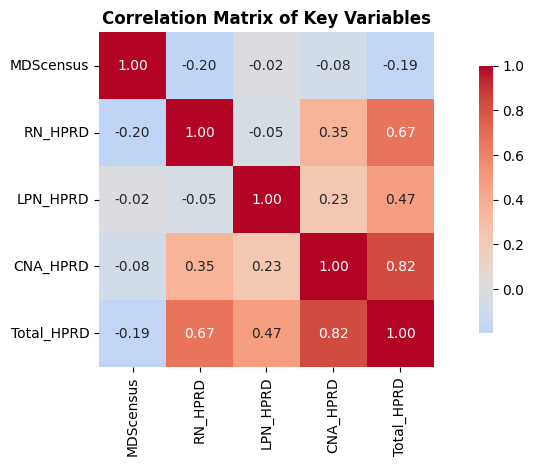

In [127]:
# 7. Correlation Heatmap of Key Variables
plt.figure(figsize=(40, 20))
plt.subplot(4, 3, 7)
corr_vars = ['MDScensus', 'RN_HPRD', 'LPN_HPRD', 'CNA_HPRD', 'Total_HPRD']
correlation_matrix = PBJDaily_Nursing_clean[corr_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Key Variables', fontsize=12, fontweight='bold')

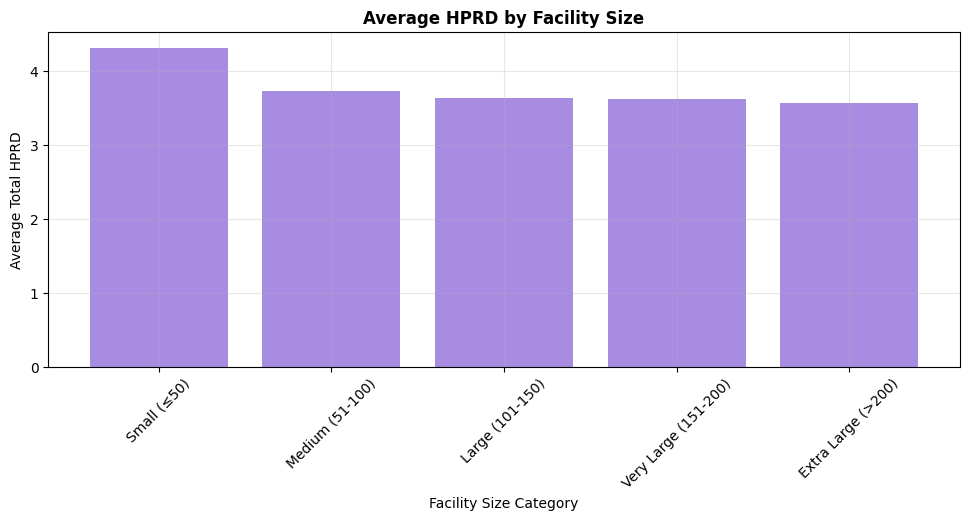

In [128]:
# 8. HPRD by Facility Size Categories
plt.figure(figsize=(40, 20))
plt.subplot(4, 3, 8)
PBJDaily_Nursing_clean['Size_Category'] = pd.cut(PBJDaily_Nursing_clean['MDScensus'],
                                  bins=[0, 50, 100, 150, 200, float('inf')],
                                  labels=['Small (≤50)', 'Medium (51-100)', 'Large (101-150)',
                                         'Very Large (151-200)', 'Extra Large (>200)'])
size_hprd = PBJDaily_Nursing_clean.groupby('Size_Category')['Total_HPRD'].mean()
bars = plt.bar(range(len(size_hprd)), size_hprd.values, color='mediumpurple', alpha=0.8)
plt.title('Average HPRD by Facility Size', fontsize=12, fontweight='bold')
plt.xlabel('Facility Size Category')
plt.ylabel('Average Total HPRD')
plt.xticks(range(len(size_hprd)), size_hprd.index, rotation=45)
plt.grid(True, alpha=0.3)

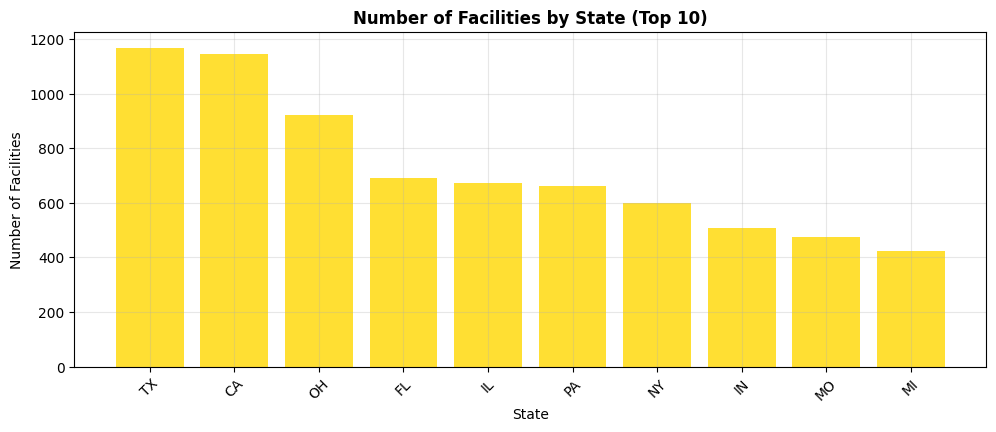

In [129]:
# 9. Top 10 States by Number of Facilities
plt.figure(figsize=(40, 20))
plt.subplot(4, 3, 9)
facility_counts = PBJDaily_Nursing_clean.groupby('STATE')['PROVNUM'].nunique().sort_values(ascending=False).head(10)
bars = plt.bar(range(len(facility_counts)), facility_counts.values, color='gold', alpha=0.8)
plt.title('Number of Facilities by State (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('State')
plt.ylabel('Number of Facilities')
plt.xticks(range(len(facility_counts)), facility_counts.index, rotation=45)
plt.grid(True, alpha=0.3)

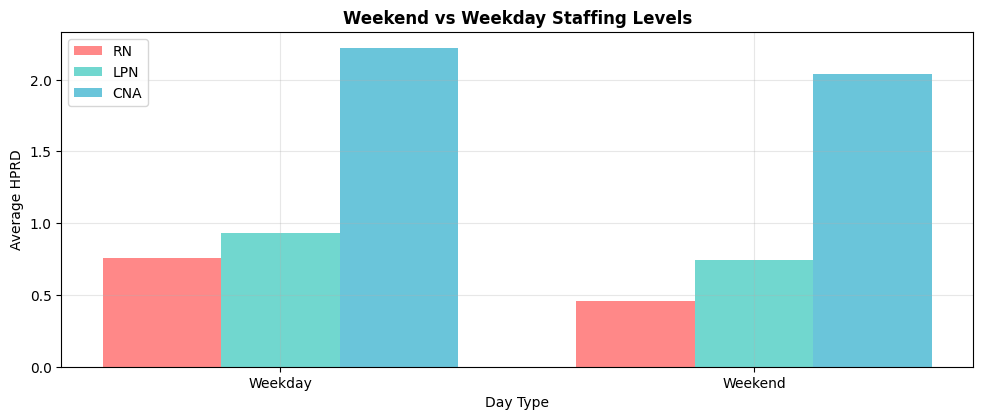

In [130]:
 #10. Weekend vs Weekday Staffing
plt.figure(figsize=(40, 20))
plt.subplot(4, 3, 10)
PBJDaily_Nursing_clean['DayOfWeek'] = PBJDaily_Nursing_clean['WorkDate'].dt.day_name()
PBJDaily_Nursing_clean['IsWeekend'] = PBJDaily_Nursing_clean['WorkDate'].dt.dayofweek >= 5
weekend_comparison = PBJDaily_Nursing_clean.groupby('IsWeekend')[['RN_HPRD', 'LPN_HPRD', 'CNA_HPRD']].mean()
x = ['Weekday', 'Weekend']
width = 0.25
x_pos = [0, 1]
plt.bar([p - width for p in x_pos], weekend_comparison['RN_HPRD'], width, label='RN', color='#FF6B6B', alpha=0.8)
plt.bar(x_pos, weekend_comparison['LPN_HPRD'], width, label='LPN', color='#4ECDC4', alpha=0.8)
plt.bar([p + width for p in x_pos], weekend_comparison['CNA_HPRD'], width, label='CNA', color='#45B7D1', alpha=0.8)
plt.title('Weekend vs Weekday Staffing Levels', fontsize=12, fontweight='bold')
plt.xlabel('Day Type')
plt.ylabel('Average HPRD')
plt.xticks(x_pos, x)
plt.legend()
plt.grid(True, alpha=0.3)

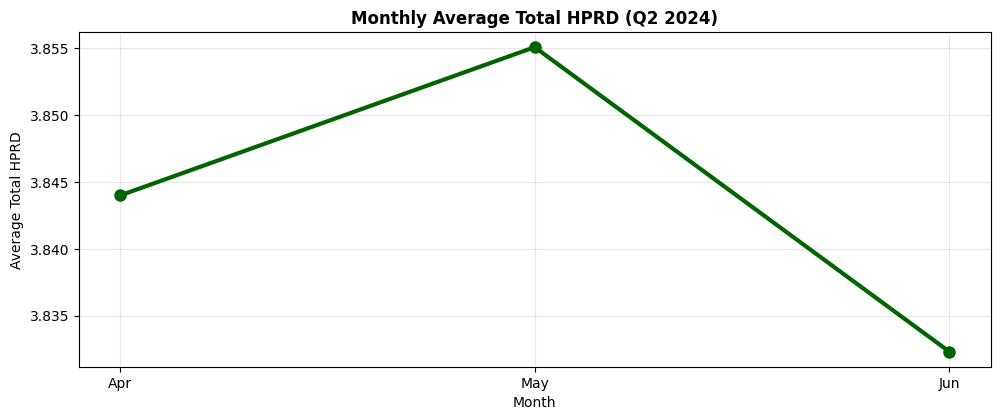

In [131]:
# 11. Monthly Staffing Trends
plt.figure(figsize=(40,20))
plt.subplot(4, 3, 11)
PBJDaily_Nursing_clean['Month'] = PBJDaily_Nursing_clean['WorkDate'].dt.month
monthly_avg = PBJDaily_Nursing_clean.groupby('Month')['Total_HPRD'].mean()
months = ['Apr', 'May', 'Jun']
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=3, markersize=8, color='darkgreen')
plt.title('Monthly Average Total HPRD (Q2 2024)', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Total HPRD')
plt.xticks(monthly_avg.index, months)
plt.grid(True, alpha=0.3)

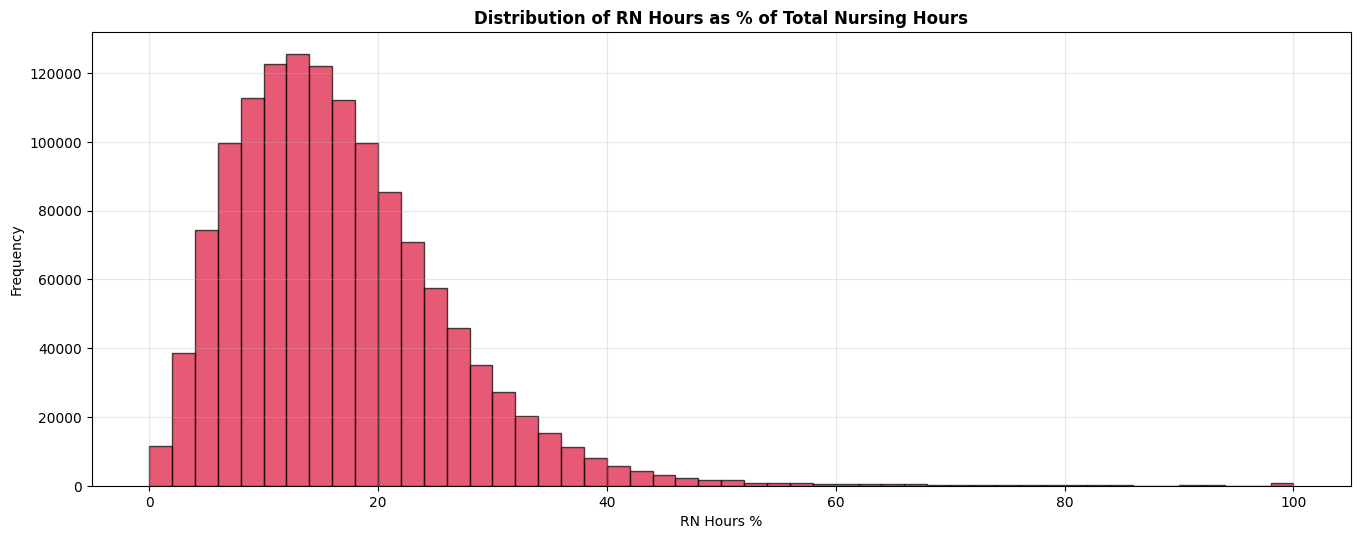

In [134]:
# 12. Distribution of RN Hours as Percentage of Total
plt.figure(figsize=(40, 20))
plt.subplot(4, 3, 12)
rn_percentage = (PBJDaily_Nursing_clean['Total_RN_Hours'] / PBJDaily_Nursing_clean['Total_Nursing_Hours']) * 100
plt.hist(rn_percentage, bins=50, alpha=0.7, color='crimson', edgecolor='black')
plt.title('Distribution of RN Hours as % of Total Nursing Hours', fontsize=12, fontweight='bold')
plt.xlabel('RN Hours %')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Observation and Insights

#### Data Overview
- The general dataset contains 1,325,004 records from nursing facilities across the United States for Q2 2024 (April-June).
- There is a total of 14,579 unique facilities across all states
- There is a total of 52 states and 5039 cities with nursing   staff distribution
-The daily staffing data represented Resident nurses(RN),LPNs,CNAs,Nurse Aides in training(NAtrn), Medical Aides/technicians


#### Key Findings
- Nursing Staff generally spend an average of 3.84 hrs HRPD(Hours Per Resident Day) accross the different facilities
-CNAs provide more hours followed by RNs,LPNS and MedAides generally provide the least hours throughout the quarter.
- More HRPD,an average greater than 4hrs,is spent on small facilities (50 or less )compared to any other facility which falls below an average of 4 hrs
- RN showed a 12% of total nursing staff hours with a frequency greatr than 120000
- There is a significant variation in staffing with TX and CA having the highest and PR having the lowest
- There is no significant difference in staffing between weekdays and weekends
-May had the highest average HRPD,followed by APR and JUN had the least
